<a href="https://colab.research.google.com/github/zitoyeo/EDA-Modeling/blob/main/Restaurant_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [32]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
zmt = pd.read_csv('/content/drive/MyDrive/zomato.csv')

In [35]:
zmt.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [36]:
zmt.menu_item

,menu_item
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
51712,[]
51713,[]
51714,[]
51715,[]


In [37]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [38]:
print("총 데이터 개수 :", zmt.shape[0] * zmt.shape[1])
print("총 결측 치 수 : {} = 전체 데이터의 {:.2f}%".format(zmt.isnull().sum().sum(), (zmt.isnull().sum().sum() * 100 / (zmt.shape[0] * zmt.shape[1]))))
print("전체 식당 수 ", zmt['name'].nunique())

총 데이터 개수 : 879189
총 결측 치 수 : 37700 = 전체 데이터의 4.29%
전체 식당 수  8792


## 2. 데이터를 보고 질문 만들기
- 방갈로르에 가장 많은 레스토랑은 ?
- 방갈로르의 레스토랑 운영 형태는 ?
- 방갈로르의 어느 지역에 레스토랑이 가장 많은가 ?
- 온라인 주문/테이블 예약이 금액과 평점에 영향을 주는가 ?
- 레스토랑의 종류 별로 메뉴가 다를까 ?
- 레스토랑 리뷰를 분석할 수 있을까 ?

## 3. 데이터 정비하기

### 3-1 필요없는 컬럼 삭제

In [39]:
zmt = zmt.drop(['menu_item','url','phone'], axis = 1)
zmt.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari


### 3-2. 중복 데이터 처리하기

In [40]:
# 중복데이터 확인하기
zmt.duplicated().sum()

np.int64(50)

In [41]:
# 중복 데이터 삭제하기

zmt.drop_duplicates(inplace=True)
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51667 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51667 non-null  object
 1   name                         51667 non-null  object
 2   online_order                 51667 non-null  object
 3   book_table                   51667 non-null  object
 4   rate                         43902 non-null  object
 5   votes                        51667 non-null  int64 
 6   location                     51646 non-null  object
 7   rest_type                    51440 non-null  object
 8   dish_liked                   23626 non-null  object
 9   cuisines                     51622 non-null  object
 10  approx_cost(for two people)  51322 non-null  object
 11  reviews_list                 51667 non-null  object
 12  listed_in(type)              51667 non-null  object
 13  listed_in(city)              51667 n

### 3-3. NaN 처리하기

In [42]:
# 컬럼별로 NULL 개수 확인하기
zmt.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,7765
votes,0
location,21
rest_type,227
dish_liked,28041
cuisines,45


In [43]:
# Nan이 존재하는 행은 다 삭제하기

zmt.dropna(how='any', inplace=True)
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23394 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      23394 non-null  object
 1   name                         23394 non-null  object
 2   online_order                 23394 non-null  object
 3   book_table                   23394 non-null  object
 4   rate                         23394 non-null  object
 5   votes                        23394 non-null  int64 
 6   location                     23394 non-null  object
 7   rest_type                    23394 non-null  object
 8   dish_liked                   23394 non-null  object
 9   cuisines                     23394 non-null  object
 10  approx_cost(for two people)  23394 non-null  object
 11  reviews_list                 23394 non-null  object
 12  listed_in(type)              23394 non-null  object
 13  listed_in(city)              23394 n

### 3-4 컬럼 정비하기

In [44]:
## 컬럼명 확인하기
zmt.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [45]:
# 컬럼명 변경하기
zmt = zmt.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)' : 'type', 'listed_in(city)' : 'city'})
zmt.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'type', 'city'],
      dtype='object')

In [46]:
# cost 칼럼에 콤마가 들어가 있어서 object 타입이다. 변경해주자

print(zmt['cost'].unique())

['800' '300' '600' '700' '550' '500' '450' '650' '400' '750' '200' '850'
 '1,200' '150' '350' '250' '1,500' '1,300' '1,000' '100' '900' '1,100'
 '1,600' '950' '230' '1,700' '1,400' '1,350' '2,200' '2,000' '1,800'
 '1,900' '180' '330' '2,500' '2,100' '3,000' '2,800' '3,400' '40' '1,250'
 '3,500' '4,000' '2,400' '1,450' '3,200' '6,000' '1,050' '4,100' '2,300'
 '120' '2,600' '5,000' '3,700' '1,650' '2,700' '4,500']


In [47]:
zmt['cost'] = zmt['cost'].astype(str)
zmt['cost'] = zmt['cost'].replace(',', '', regex = True) # 콤마 삭제하기
zmt['cost'] = zmt['cost'].astype(float) #데이터 타입을 float으로 바꾸기
zmt['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [48]:
# rating 컬럼 정비하기

print(zmt['rate'].unique())

['4.1/5' '3.8/5' '3.7/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.0/5' '3.6/5'
 '2.8/5' '4.4/5' '3.1/5' '4.3/5' '2.6/5' '3.3/5' '3.5/5' '3.8 /5' '3.2/5'
 '4.5/5' '2.5/5' '2.9/5' '3.4/5' '2.7/5' '4.7/5' 'NEW' '2.4/5' '2.2/5'
 '2.3/5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5' '2.9 /5' '2.7 /5'
 '2.5 /5' '2.6 /5' '4.5 /5' '4.3 /5' '3.7 /5' '4.4 /5' '4.9/5' '2.1/5'
 '2.0/5' '1.8/5' '3.4 /5' '3.6 /5' '3.3 /5' '4.6 /5' '4.9 /5' '3.2 /5'
 '3.0 /5' '2.8 /5' '3.5 /5' '3.1 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [49]:
zmt['rate'] = zmt['rate'].astype(str) #string으로 변경
zmt['rate'] = zmt['rate'].replace('/5','',regex= True) #'/5' ->삭제
zmt['rating'] = zmt['rate'].replace('NEW', '-', regex=True) # NEW => -로 변경

zmt = zmt.loc[zmt['rate'] != 'New'].reset_index(drop=True)

In [50]:
zmt.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city,rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8


In [51]:
zmt['rating'] = zmt['rating'].replace('-','0', regex= True) #rating 컬럼은 숫자 타입으로 바꿔주기 위해 한번더 변환
zmt['rating'] = zmt['rating'].astype(float) #float으로 변환

In [52]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23394 entries, 0 to 23393
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23394 non-null  object 
 1   name          23394 non-null  object 
 2   online_order  23394 non-null  object 
 3   book_table    23394 non-null  object 
 4   rate          23394 non-null  object 
 5   votes         23394 non-null  int64  
 6   location      23394 non-null  object 
 7   rest_type     23394 non-null  object 
 8   dish_liked    23394 non-null  object 
 9   cuisines      23394 non-null  object 
 10  cost          23394 non-null  float64
 11  reviews_list  23394 non-null  object 
 12  type          23394 non-null  object 
 13  city          23394 non-null  object 
 14  rating        23394 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 2.7+ MB


In [53]:
# online_order와 book_table의 컬럼의 Yes -> 1, No ->0으로 변경
zmt['online_order'] = zmt['online_order'].map({"Yes" : 1, "No" : 0}).astype(int)
zmt['book_table'] = zmt['book_table'].map({'Yes' : 1, "No" : 0}).astype(int)

zmt.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city,rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8


In [54]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23394 entries, 0 to 23393
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23394 non-null  object 
 1   name          23394 non-null  object 
 2   online_order  23394 non-null  int64  
 3   book_table    23394 non-null  int64  
 4   rate          23394 non-null  object 
 5   votes         23394 non-null  int64  
 6   location      23394 non-null  object 
 7   rest_type     23394 non-null  object 
 8   dish_liked    23394 non-null  object 
 9   cuisines      23394 non-null  object 
 10  cost          23394 non-null  float64
 11  reviews_list  23394 non-null  object 
 12  type          23394 non-null  object 
 13  city          23394 non-null  object 
 14  rating        23394 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 2.7+ MB


### 4. EDA & Visualization

Text(0, 0.5, 'Restaurant name')

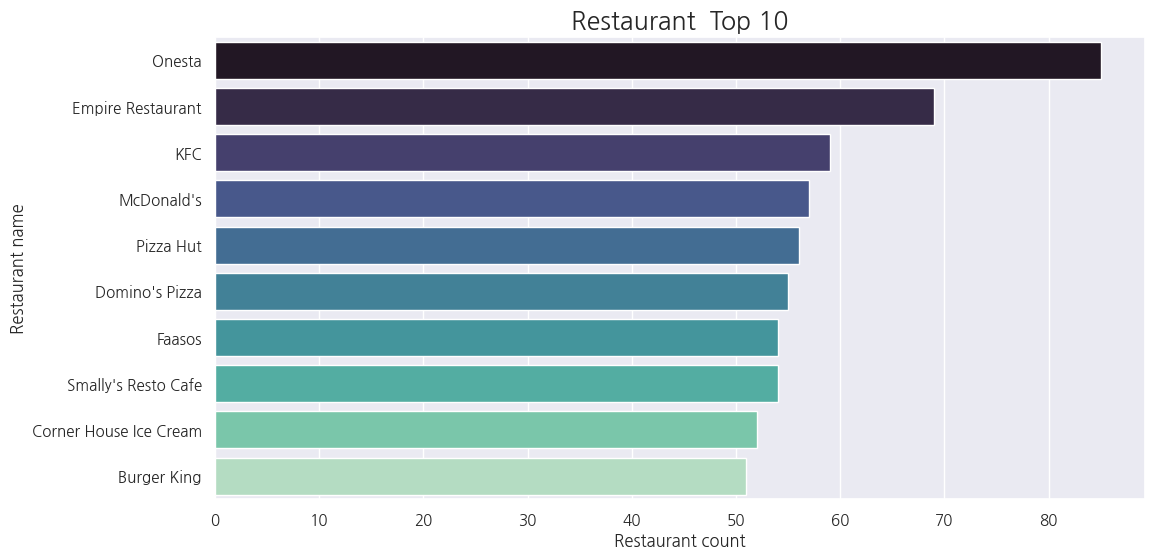

In [55]:
#매장 수가 가장 많은 레스토랑은 ?

f, ax = plt.subplots(1,1, figsize =(12,6))

sns.barplot(x=zmt['name'].value_counts()[:10], y=zmt['name'].value_counts()[:10].index, palette='mako')
plt.title('Restaurant  Top 10', size = 18)
plt.xlabel('Restaurant count')
plt.ylabel('Restaurant name')

Text(0, 0.5, 'Restaurant type')

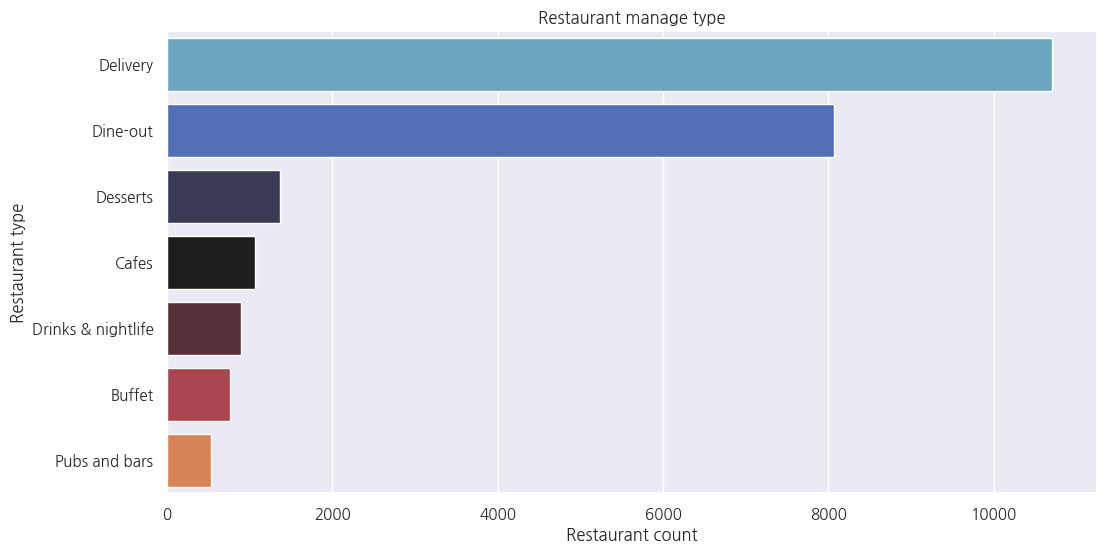

In [56]:
# 레스토랑의 운영형태

plt.figure(figsize=(12,6))

sns.barplot(x=zmt['type'].value_counts()[:10], y=zmt['type'].value_counts()[:10].index, palette='icefire')
plt.title('Restaurant manage type')
plt.xlabel('Restaurant count')
plt.ylabel('Restaurant type')

<ipython-input-57-ea22e375677e>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(zmt['city']).set_xticklabels(sns.countplot(zmt['city']).get_xticklabels(), rotation=0, ha="right")


Text(0, 0.5, '')

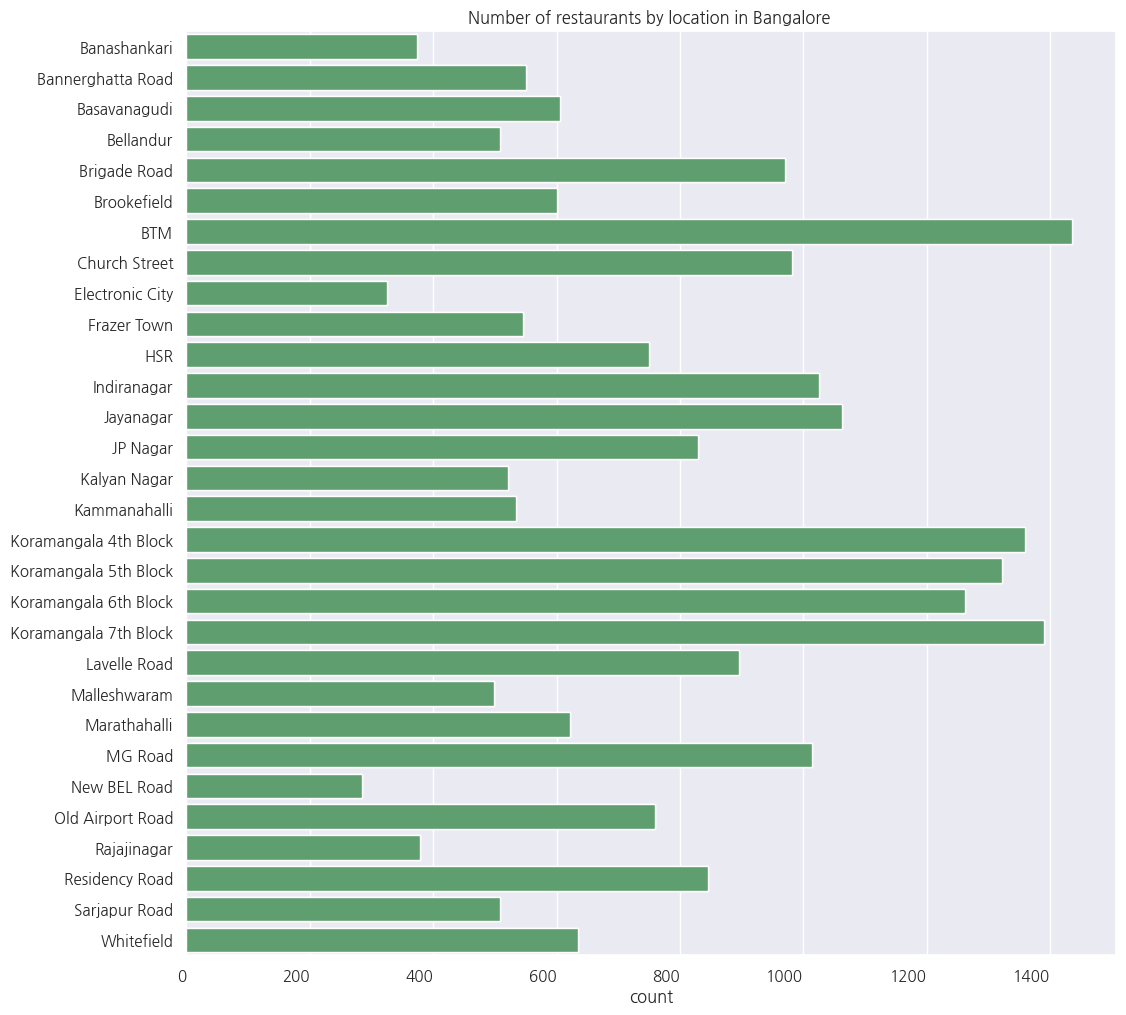

In [57]:
# 방갈로르의 위치 별 레스토랑수

f,ax = plt.subplots(1,1, figsize=(12,12))

sns.countplot(zmt['city'], ax=ax)
sns.countplot(zmt['city']).set_xticklabels(sns.countplot(zmt['city']).get_xticklabels(), rotation=0, ha="right")
plt.title("Number of restaurants by location in Bangalore ")
plt.ylabel('')

In [59]:
# #온라인 주문과 예약이 가능한 식당 비율
# f, ax = plt.subplots(1, 2, figsize = (13,5))

# sns.countplot(zmt['online_order'],palette = 'dark:salmon_r', ax=ax[0])

# ax[0].set_title('온라인 주문 가능 매장')
# ax[0].set_ylabel('Number of outlets')

# sns.countplot(zmt['book_table'],palette = 'YlOrBr', ax=ax[1])
# ax[1].set_title('테이블 예약 가능 매장')
# ax[1].set_ylabel('')

(0.0, 2000.0)

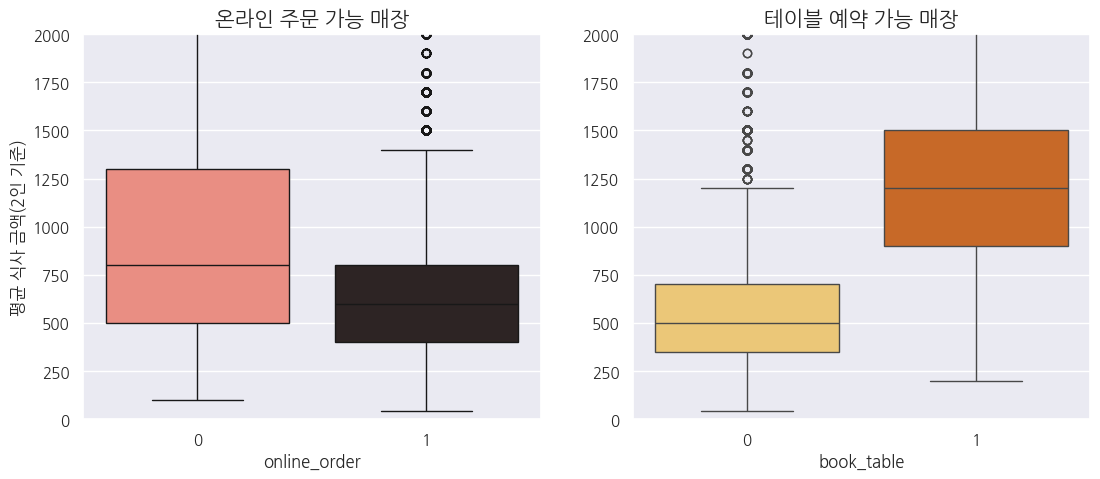

In [60]:
#온라인 주문과 테이블 예약과 평균 금액과의 관계
f, ax = plt.subplots(1, 2, figsize = (13,5))

sns.boxplot(x=zmt['online_order'], y=zmt['cost'], palette = 'dark:salmon_r', ax=ax[0])
ax[0].set_title('온라인 주문 가능 매장', size=15)
ax[0].set_ylabel('평균 식사 금액(2인 기준)')
ax[0].set_ylim(0, 2000)

sns.boxplot(x=zmt['book_table'], y=zmt['cost'], palette = 'YlOrBr', ax=ax[1])
ax[1].set_title('테이블 예약 가능 매장', size=15)
ax[1].set_ylabel('')
ax[1].set_ylim(0, 2000)

<Axes: xlabel='book_table', ylabel='rating'>

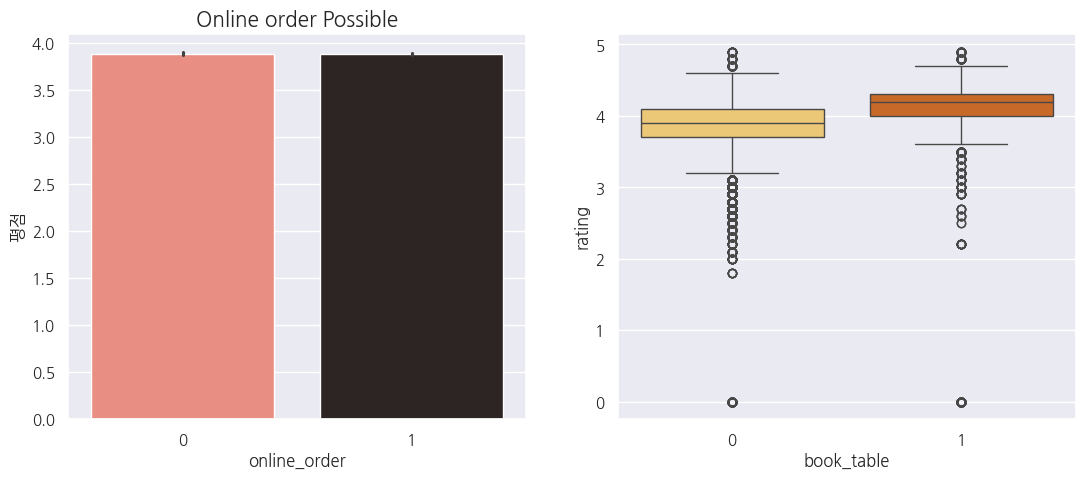

In [61]:
#온라인 주문과 테이블 예약과 평점과의 관계

f,ax = plt.subplots(1,2, figsize=(13,5))

sns.barplot(x=zmt['online_order'], y=zmt['rating'], palette='dark:salmon_r', ax=ax[0])
ax[0].set_title('Online order Possible', size=15 )
ax[0].set_ylabel('평점')

sns.boxplot(x=zmt['book_table'], y=zmt['rating'],  palette = 'YlOrBr', ax=ax[1])

In [63]:
#온라인 주문과 예약이 가능하면 평점이 더 높을까 ?
a = pd.crosstab(zmt['rate'], zmt['online_order'])


In [64]:
 pd.crosstab(zmt['rate'], zmt['online_order'])

online_order,0,1
rate,,
1.8,2,0
1.8,3,0
2.0,4,0
2.0,7,0
2.1,4,7
...,...,...
4.8,11,12
4.8,23,20
4.9,8,17


In [65]:
pd.crosstab(zmt['rate'], zmt['book_table'])
b = pd.crosstab(zmt['rate'], zmt['book_table'])

In [66]:
b

book_table,0,1
rate,,
1.8,2,0
1.8,3,0
2.0,4,0
2.0,7,0
2.1,11,0
...,...,...
4.8,10,13
4.8,13,30
4.9,8,17


Text(0.5, 0, 'Ratings')

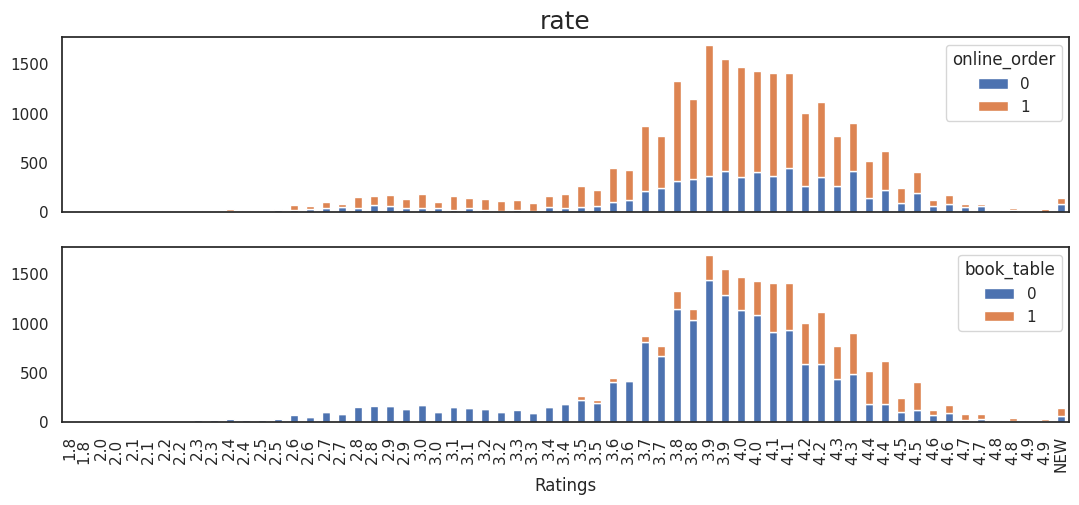

In [70]:
#sstacking bar 그래프로 나타내기
f, ax = plt.subplots(2,1, figsize=(13,5))

sns.set_style('white')

a.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].xaxis.set_visible(False)
ax[0].set_title('rate', size = 18)
plt.ylabel('')
plt.xlabel('')

b.plot(kind='bar', stacked=True, ax=ax[1])
plt.ylabel('')
plt.xlabel('Ratings')

### 5. 텍스트 클라우드


In [71]:
#패키지 삽입

from wordcloud import WordCloud, STOPWORDS

In [72]:
zmt_re = zmt.copy()

In [73]:
zmt_re

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,type,city,rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23389,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,1,1,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",Pubs and bars,Whitefield,3.8
23390,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",Pubs and bars,Whitefield,3.9
23391,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,0,0,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",Pubs and bars,Whitefield,2.8
23392,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,2.5


In [81]:
# 상위 3개 레스토랑 타입에 대해서 워드 클라우드를 그리자
rest = zmt_re['rest_type'].value_counts()[:3].index

In [76]:
rest

Index(['Casual Dining', 'Quick Bites', 'Cafe'], dtype='object', name='rest_type')

In [77]:
#레스토랑 타입별로 워드클라우드 그리는 함수

def zomato_wordcloud(rest):
    plt.figure(figsize = (20,20))
    for i, rest_tp in enumerate(rest):
        plt.subplot(1,3,i+1)
        dishes = ''
        data = zmt_re[zmt_re['rest_type'] == rest_tp]
        #dish_liked에 있는 단어들을 쪼개준다
        for word in data['dish_liked']:
            words=word.split()
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(background_color='white', colormap = 'seismic', collocations=False, stopwords = stopwords, width=1200, height=1200).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(rest_tp)
        plt.axis("off")


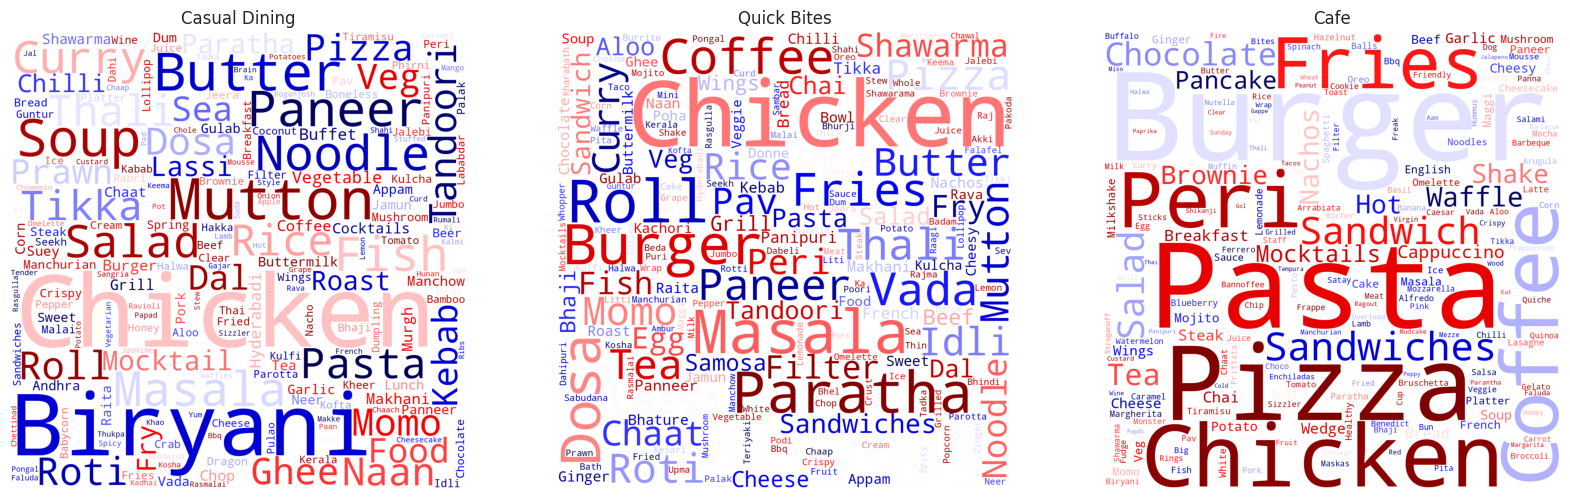

In [78]:
stopwords = set(STOPWORDS)
zomato_wordcloud(rest)

##6.간단한 감정분석(Sentiment Analysis)
 감정 분석은 텍스트 분석 기술을 통해, 텍스트 데이터 내에서 감정(긍정적, 부정적 및 중립적)을 해석하고 분류하는 방법입니다.  
   감정 분석 패키지에도 여러가지가 있는데, 여기서는 TextBlob 패키지를 활용
 감정은 미리 단어 사전에 분류되어진 값을 사용하는데,     
 polarity 값이 양의 값을 가질 경우 긍정, 음의 값을 가지면 부정을 의미하며 0일 경우 중립 단어입니다.

In [79]:
from textblob import TextBlob

In [80]:
#리뷰를 감정 분석한 새로운 컬럼(Review_sent)을 만든다

sent_res =[]

for i in range(0,len(zmt)) :
  analysis = TextBlob(zmt.loc[i,'reviews_list']) #리뷰의 감정을 분석한다.
  if analysis.sentiment.polarity > 0 :
    sent_res.append('positive')
  elif analysis.sentiment.polarity == 0 :
    sent_res.append('neutral')
  else :
    sent_res.append('negative')


zmt['review_sent'] = sent_res

In [82]:
# plotly로 비용과 평점 사이의 상관관계 나타내고 감정 분석 결과를 나눠서 보자

from plotly.subplots import make_subplots
import plotly.express as px

# 원의 크기는 투표수로 나타낸다.

fig = px.scatter(zmt, x="rate", y="cost", size="votes", color='review_sent', log_x=True, size_max=60)
fig.show()

## 7.Review

* 방갈로르에 가장 많은 레스토랑은?  
* 방갈로르의 레스토랑 운영 형태는?  
* 방갈로르의 어느 지역에 레스토랑이 가장 많은가?  
* 온라인 주문/테이블 예약이 금액과 평점에 영향을 주는가?  
> 테이블 예약 가능 매장인 경우 금액대도 높고 평점도 좋았다.  
온라인 주문 여부는 금액과 평점에 큰 차이를 끼치지 않았다.

* 레스토랑의 종류 별로 메뉴가 다를까?
> 텍스트 클라우드로 메뉴를 분석했다
* 레스토랑 리뷰를 분석할 수 있을까?
> 감정분석을 통해 리뷰의 긍정/부정/중립을 나누어 볼 수 있었다